# Knowledge

📚 Represent personal Knowledge as a graph, with nodes for articles and edges for connections between them. The connections are computed based on the number of tags in commun. This should serve as a way to discover visually new content, and browse through existing content.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('diigo/diigo_csv_2020_10_05.csv')
df.head()

,title,url,tags,description,comments,annotations,created_at
0,What's New in Python 3.9 | Future of Python | ...,https://towardsdatascience.com/python-3-9-9c2c...,NaN,NaN,NaN,NaN,2020-10-05 14:30:12
1,Topic Modeling with BERT. | Towards Data Science,https://towardsdatascience.com/topic-modeling-...,"""data science""",NaN,NaN,NaN,2020-10-05 14:27:29
2,Building Music Playlists Recommendation System...,https://towardsdatascience.com/building-music-...,"music,""data science""",NaN,NaN,NaN,2020-10-03 14:42:32
3,Internet des objets : PTC continue ses emplett...,http://www.lembarque.com/internet-des-objets-p...,"platform,internet,embarqué,PTC,iot",NaN,NaN,NaN,2017-01-27 09:02:14
4,"WeChat, ou comment prendre les plateformes à l...",http://www.paristechreview.com/2017/01/15/wech...,platform,NaN,NaN,NaN,2017-01-17 16:12:12


In [4]:
df.tags.fillna('')

0                                                     
1                                       "data science"
2                                 music,"data science"
3                   platform,internet,embarqué,PTC,iot
4                                             platform
                             ...                      
2729                       "embedded system",wikipedia
2730    "embedded system",automotive,wikipedia,windows
2731                       wikipedia,"embedded system"
2732                                             Tools
2733                           bookmarking,diigo,tools
Name: tags, Length: 2734, dtype: object

In [5]:
n = len(df)
n

2734

## Tagslist

In [6]:
list0 = ["," for i in range(len(df))]
# df0 = pd.DataFrame(list0)

In [7]:
s0 = pd.Series(list0)

In [8]:
s = df.tags.fillna('') + s0
tagsum = s.sum()

In [9]:
tagslist = tagsum.split(",")
tagslist = list(dict.fromkeys(tagslist))
tagslist.remove('')
p = len(tagslist)
p

667

In [10]:
tagslist[0:10]

['"data science"',
 'music',
 'platform',
 'internet',
 'embarqué',
 'PTC',
 'iot',
 'project',
 '"knowledge management"',
 'trello']

### Handle multiple tags for one article

In [11]:
df['tags'][4]

'platform'

In [12]:
tagslist.index(df['tags'][4])

2

In [13]:
l = df['tags'][4].split(",")
l

['platform']

In [14]:
l = df['tags'][2].split(",")
l

['music', '"data science"']

In [15]:
for i in l:
    print(tagslist.index(i))

1
0


In [16]:
df['tags'][2].split(",")[0]

'music'

### Handle no tag for one article

In [17]:
# handle cases with no tag (nan)
df['tags'][0]

nan

In [18]:
pd.isna(df['tags'][0])

True

In [19]:
from math import isnan
isnan(df['tags'][0])

True

In [20]:
df['tags'][[0]].isnull().sum()

1

In [21]:
df['tags'].isnull()

0        True
1       False
2       False
3       False
4       False
        ...  
2729    False
2730    False
2731    False
2732    False
2733    False
Name: tags, Length: 2734, dtype: bool

In [22]:
~pd.isna(df['tags'][0])

-2

## Adjacency matrix linking articles and tags



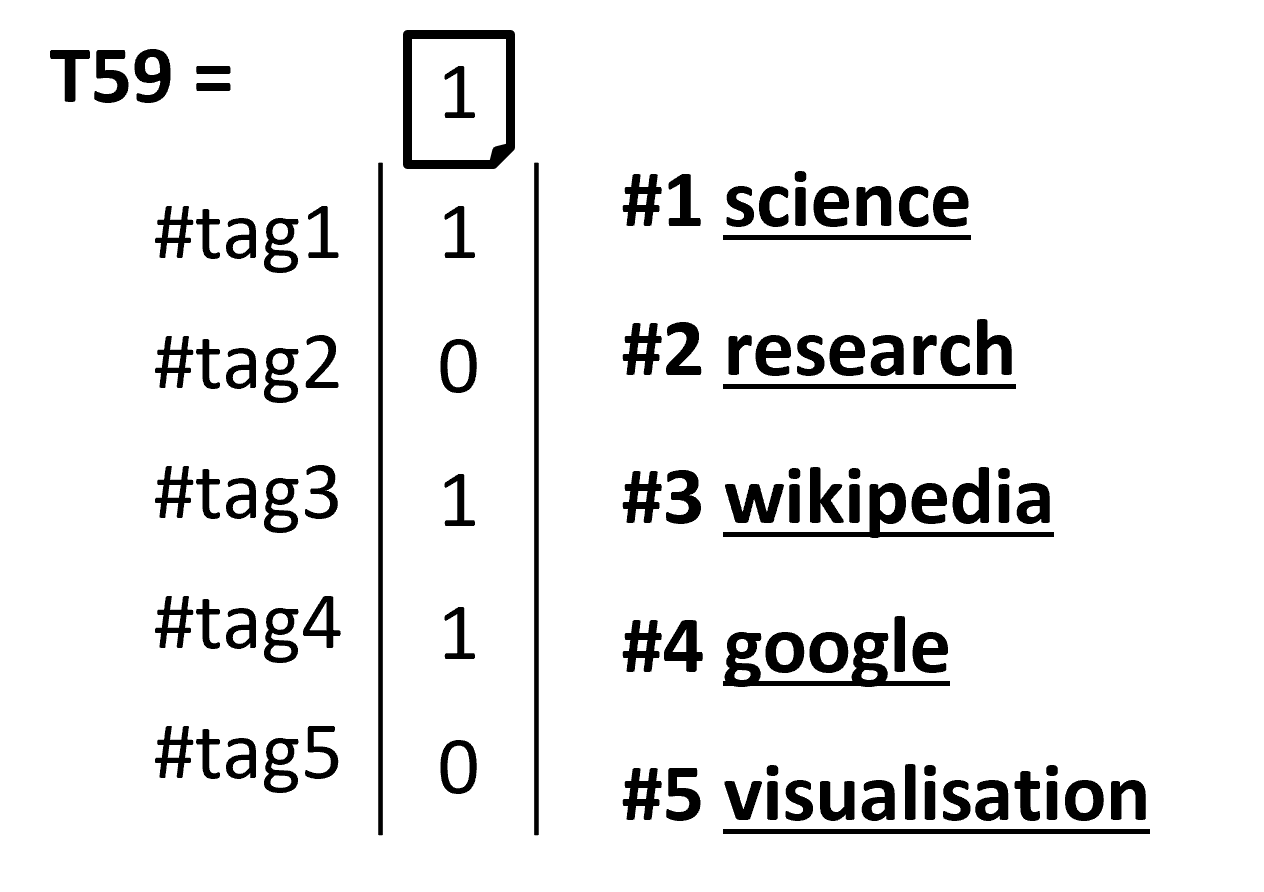

In [23]:
from IPython.display import Image 
Image(filename='img/file_1_vector.png',width=300)

In [24]:
# Create a vector of n tags appearing in the set of articles
# Incrementing in parallel the matrix T joining the articles (rows) with the corresponding tags(columns)

import numpy as np

T = np.zeros((n,p))

for index, row in df.iterrows():
    # iterate on the dataframe of articles 
    if not pd.isna(row['tags']):
        l = row['tags'].split(",")
        for i in l:
            j = tagslist.index(i)
            T[index,j] = 1

In [25]:
T[1,0] # article on "Topic Modeling" with tag "data science"

1.0

In [26]:
w = np.where(T[1]==1)
v = w[0]
v # array of positions of 1s in the vector T[1]

array([0], dtype=int64)

In [27]:
np.where(T[2]==1)

(array([0, 1], dtype=int64),)

In [28]:
np.where(T[3]==1)

(array([2, 3, 4, 5, 6], dtype=int64),)

In [29]:
v = np.where(T==1)
v1 = v[0]
v2 = v[1]
v1,v2

(array([   1,    2,    2, ..., 2733, 2733, 2733], dtype=int64),
 array([  0,   0,   1, ...,  67, 198, 199], dtype=int64))

https://www.w3schools.com/python/numpy_array_search.asp

In [30]:
T2 = np.transpose(T)

In [31]:
# Computation of the matrix Z which contains 
# on the diagonale the number of appearance di of each tag i
# on the other elements the degree d(i,j) of closeness of 2 tags (i,j)
# this matrix is symmetrical

Z = np.matmul(T2,T)

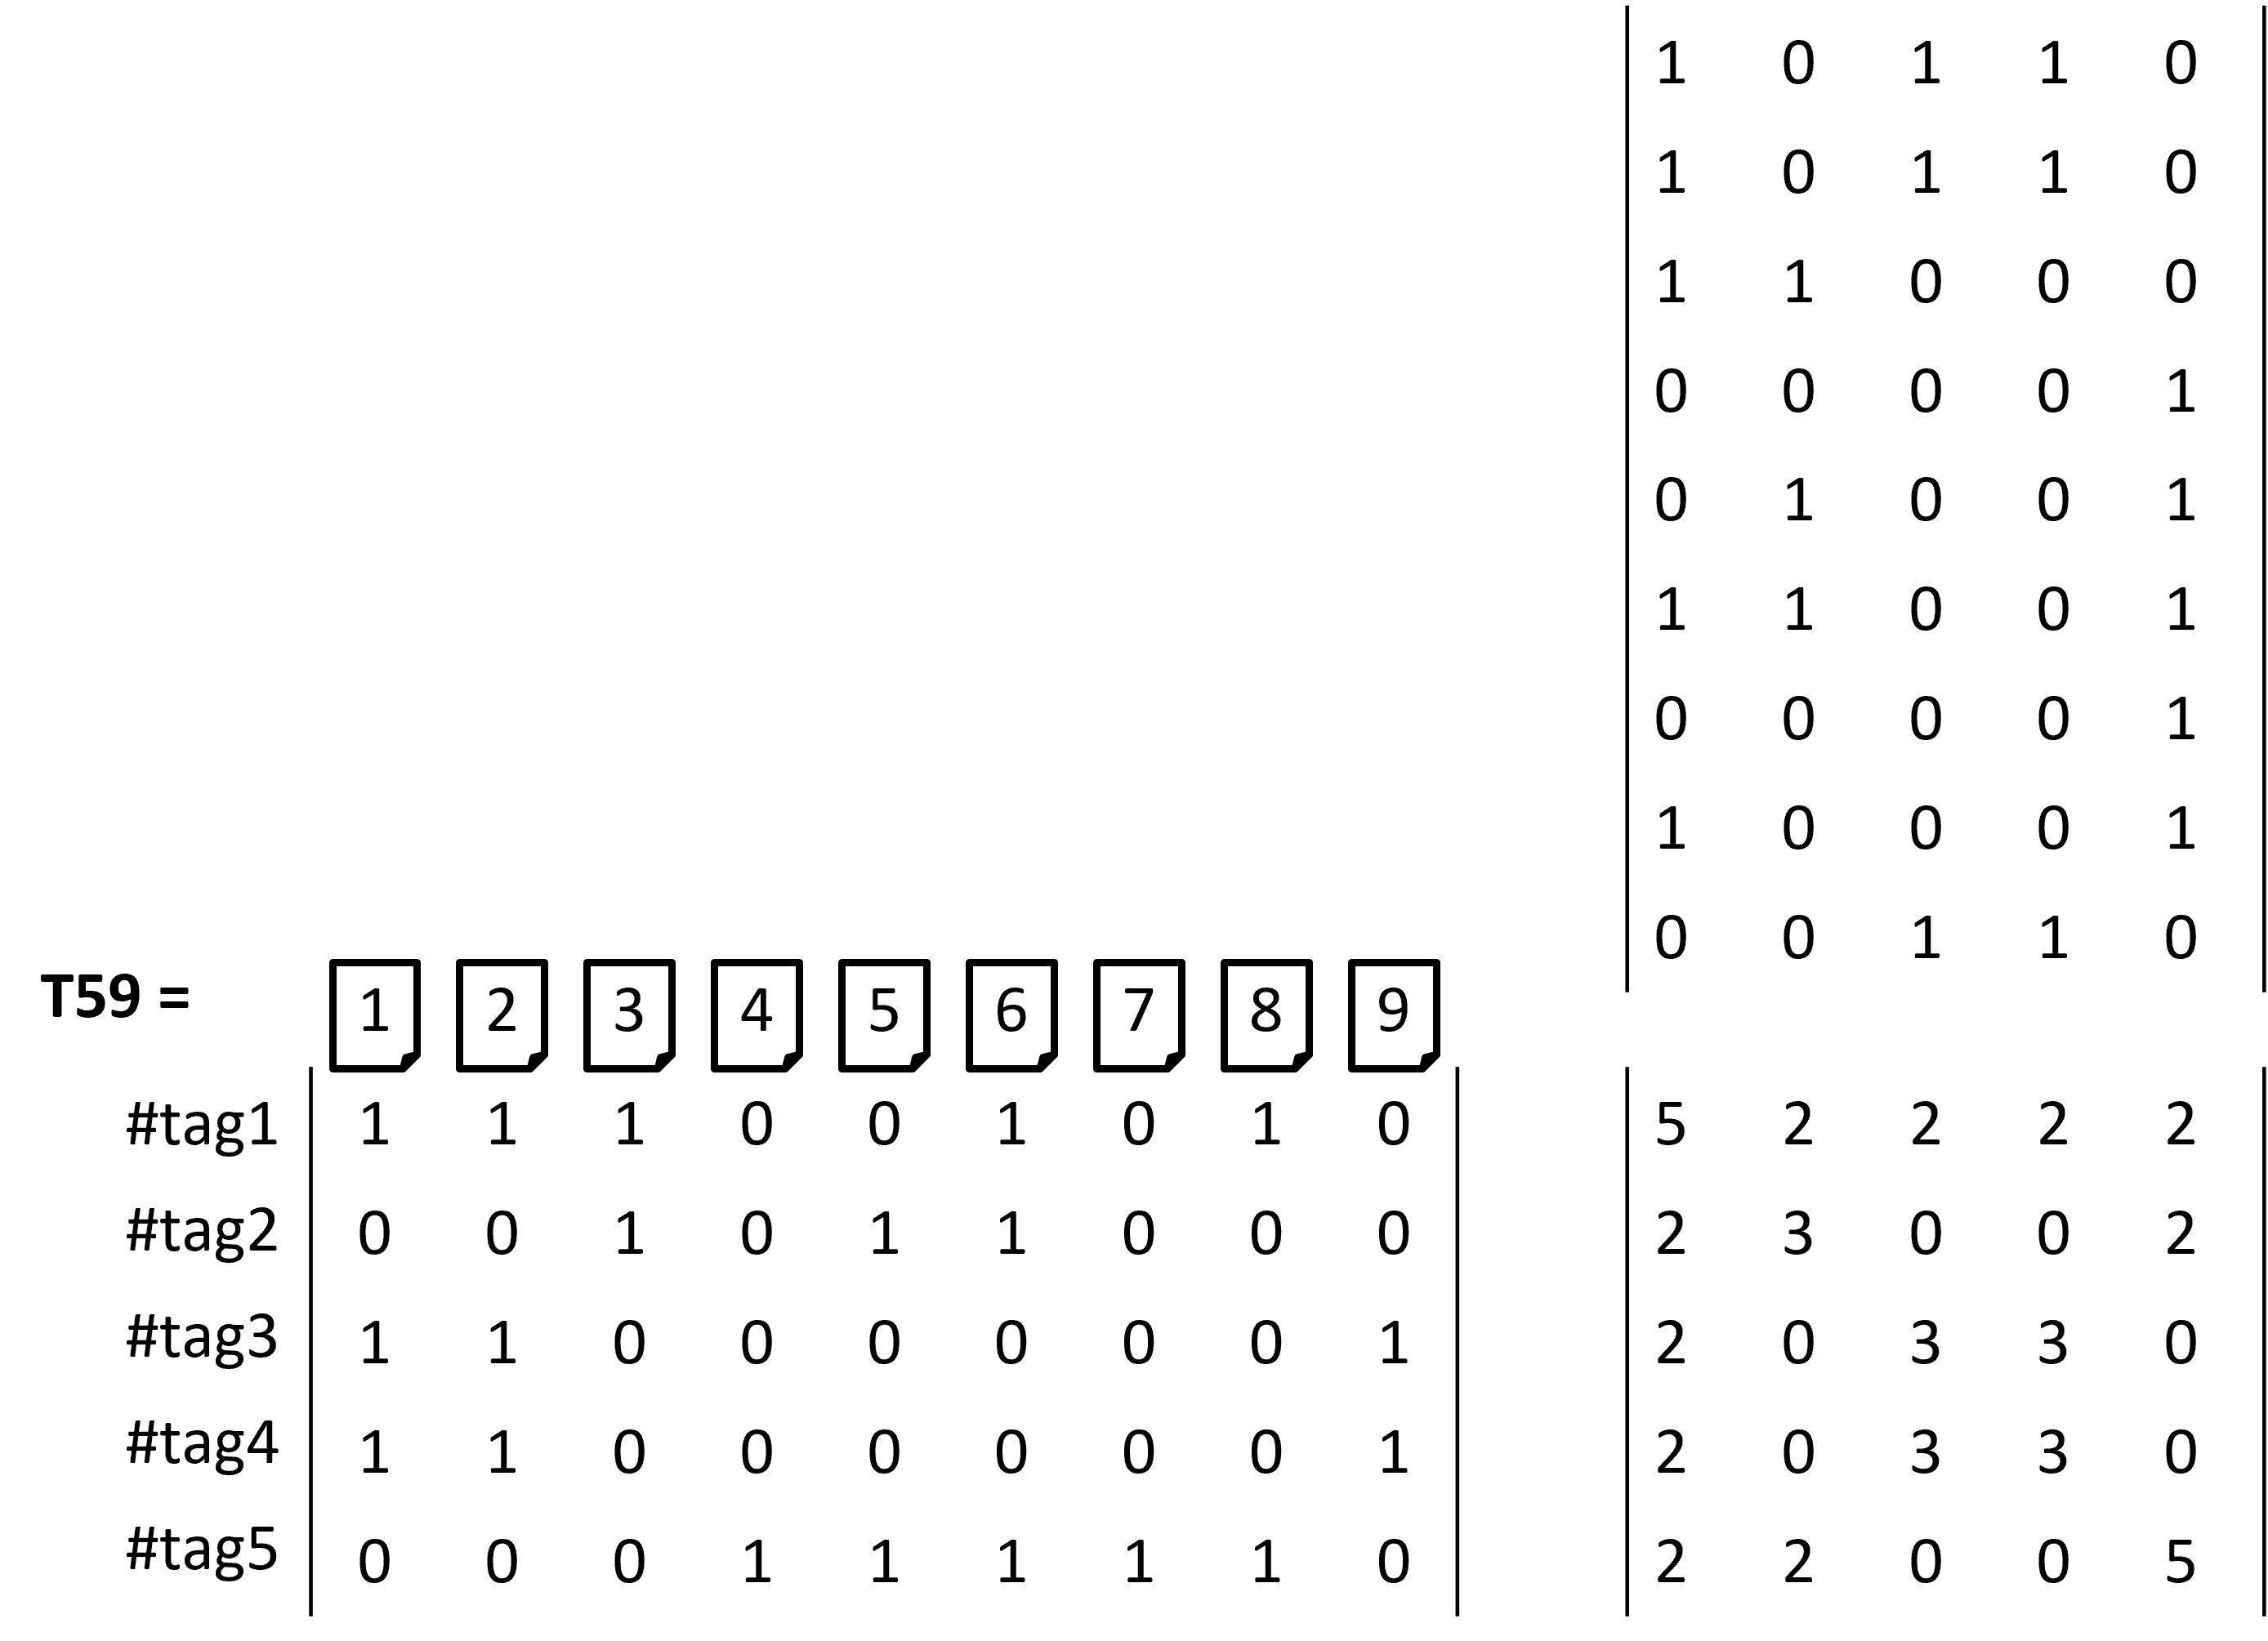

In [44]:
from IPython.display import Image 
Image(filename='img/adjacency_matrix_building.png')

In [33]:
Zdiag=[]
for i in range(len(Z)):
    Zdiag.append(Z[i,i])

## Sort the 100 most used tags

In [35]:
# pd.Series(tagslist)
tags = pd.DataFrame(tagslist, columns=["tag"])
tags["r"]=Zdiag
tags.head()

,tag,r
0,"""data science""",2.0
1,music,19.0
2,platform,12.0
3,internet,29.0
4,embarqué,6.0


In [36]:
# zdiag = pd.DataFrame(Zdiag,columns = ["r"])

In [37]:
# Zdiag.sort(reverse=True)
# Zdiag

In [38]:
# Sorting by descending value of r, and selecting the 100 first tags
tags100 = tags.sort_values("r",ascending = False)[0:100]
tags100

,tag,r
28,software,281.0
12,"""usine nouvelle""",188.0
77,wikipedia,168.0
79,scilab,137.0
112,wikipédia,132.0
...,...,...
637,Veille,18.0
25,maker,18.0
144,education,18.0
158,code,17.0


## Edges list

In [39]:
E = []
# Iterate on the upper triangle matrix above the diag of Z
for i in range(len(Z)):
    for j in range(i+1,len(Z)):
        if Z[i,j] !=0:
            E.append([i,j])

In [40]:
edges = pd.DataFrame(E, columns=["source","target"])
edges

,source,target
0,0,1
1,1,12
2,1,20
3,1,21
4,1,28
...,...,...
3800,658,660
3801,659,660
3802,659,661
3803,660,661


## Nodes list

In [42]:
nodes = pd.DataFrame(tagslist, columns=["tag"])
nodes

,tag
0,"""data science"""
1,music
2,platform
3,internet
4,embarqué
...,...
662,product
663,international
664,bitkom
665,Unternehmen


In [43]:
# nodes.to_csv('diigo/nodes_diigo.csv')
# edges.to_csv('diigo/edges_diigo.csv')

## Import Nodes and Edges

If starting from existing saved files

In [41]:
nodes = pd.read_csv('diigo/nodes_diigo.csv')
nodes

,id,tag,r
0,1,tag,8
1,2,wikipédia,83
2,3,science,6
3,4,visualisation,8
4,5,wired,1
...,...,...,...
758,759,embedded system,9
759,760,Unternehmen,1
760,761,it,1
761,762,bitkom,1


In [42]:
# Filter out the tags that are only used once
nodes[nodes['r'] == 1]

,id,tag,r
4,5,wired,1
16,17,Arts et Métiers,1
28,29,google books,1
38,39,hosting,1
40,41,khan academy,1
...,...,...,...
757,758,konkurrenz,1
759,760,Unternehmen,1
760,761,it,1
761,762,bitkom,1


In [43]:
nodes2 = nodes[nodes['r'] > 1]
nodes2

,id,tag,r
0,1,tag,8
1,2,wikipédia,83
2,3,science,6
3,4,visualisation,8
5,6,iot,60
...,...,...,...
746,747,deutsch,3
747,748,unternehmensberatung,4
748,749,JE,3
749,750,european,3


In [44]:
edges = pd.read_csv('Diigo/edges_diigo.csv')
edges

,source,target
0,1,2
1,1,10
2,1,15
3,1,30
4,1,110
...,...,...
1930,750,754
1931,759,760
1932,759,761
1933,759,762


In [45]:
edges[edges.source == 17]

,source,target
383,17,18


In [46]:
nodes[nodes.id == 18]

,id,tag,r
17,18,video,29


## Top 10 graph

In [65]:
nodes = pd.read_csv('diigo/nodes_diigo_top10.csv')
edges = pd.read_csv('diigo/edges_diigo_top10.csv')

## Graph building

In [67]:
import networkx as nx
G = nx.Graph()

In [68]:
for index, row in nodes.iterrows():
    # print(row['tag'],row['r'])
    # G.add_node(row['id'])
    G.add_node(index)

In [69]:
G.number_of_nodes()

10

In [70]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [71]:
type(edges['source'][0])

numpy.int64

In [72]:
# By default, source and target are numpy.int64
# Translated to int for further JSON serialization
for index, row in edges.iterrows():
    # print(row['source'],row['target'])
    G.add_edge(int(row['source']),int(row['target']))

In [73]:
# Check that we have not added nodes in the process of adding edges
G.number_of_nodes()

10

## D3 Force-directed graph
https://observablehq.com/@d3/force-directed-graph

In [74]:
import json
import flask
# import networkx as nx
from networkx.readwrite import json_graph

In [75]:
# nodes.loc[[0]].tag
nodes.tag[0]

'software'

In [76]:
# this d3 example uses the name attribute for the mouse-hover value,
# so add a name to each node
for n in G:
    # nodes id start at 0
    G.nodes[n]["name"] = nodes.tag[n]
    # G.nodes[n]["name"] = nodes.tag[n-1]
    # G.nodes[n]["name"] = n
    # print(nodes.tag[n])
    # print(n)

In [77]:
G.nodes[0]["name"]

'software'

In [78]:
# G.nodes.data()

In [79]:
# write json formatted data
d = json_graph.node_link_data(G)  # node-link format to serialize
# d

In [80]:
# d.get('nodes')
# d['nodes']

In [81]:
# type(d['nodes'][0]['id'])
type(d['links'][0]['target'])

int

Pay attention when building JSON:

*TypeError: Object of type int64 is not JSON serializable*

In [82]:
# write json
json.dump(d, open("force/force.json", "w"))
print("Wrote node-link JSON data to force/force.json")

Wrote node-link JSON data to force/force.json


In [83]:
# Serve the file over http to allow for cross origin requests
app = flask.Flask(__name__, static_folder="force")


@app.route("/")
def static_proxy():
    return app.send_static_file("force.html")


print("\nGo to http://localhost:8000 to see the example\n")
app.run(port=8000)


Go to http://localhost:8000 to see the example

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8000/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Sep/2021 23:12:52] "GET / HTTP/1.1" 200 -


## Simple representation

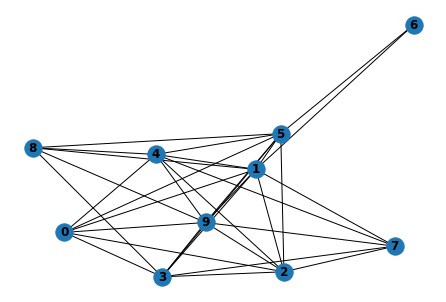

In [84]:
nx.draw(G, with_labels=True, font_weight='bold')